#**Unveiling the Android App Market: Analyzing Google Play Store Data**

Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Data Preparation

Load the datasets

In [2]:
apps = pd.read_csv('/content/apps.csv')

In [3]:
user_reviews = pd.read_csv('/content/user_reviews.csv')

Display the initial structure and summary of the data

In [4]:
print(apps.shape)

(9659, 14)


In [5]:
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


In [6]:
print(apps.describe())

         Unnamed: 0       Rating       Reviews         Size
count   9659.000000  8196.000000  9.659000e+03  8432.000000
mean    5666.172896     4.173243  2.165926e+05    20.395327
std     3102.362863     0.536625  1.831320e+06    21.827509
min        0.000000     1.000000  0.000000e+00     0.000000
25%     3111.500000     4.000000  2.500000e+01     4.600000
50%     5814.000000     4.300000  9.670000e+02    12.000000
75%     8327.500000     4.500000  2.940100e+04    28.000000
max    10840.000000     5.000000  7.815831e+07   100.000000


In [7]:
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [8]:
print(apps.head())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [9]:
print(apps.tail())

      Unnamed: 0                                            App  \
9654       10836                               Sya9a Maroc - FR   
9655       10837               Fr. Mike Schmitz Audio Teachings   
9656       10838                         Parkinson Exercices FR   
9657       10839                  The SCP Foundation DB fr nn5n   
9658       10840  iHoroscope - 2018 Daily Horoscope & Astrology   

                 Category  Rating  Reviews  Size     Installs  Type Price  \
9654               FAMILY     4.5       38  53.0       5,000+  Free     0   
9655               FAMILY     5.0        4   3.6         100+  Free     0   
9656              MEDICAL     NaN        3   9.5       1,000+  Free     0   
9657  BOOKS_AND_REFERENCE     4.5      114   NaN       1,000+  Free     0   
9658            LIFESTYLE     4.5   398307  19.0  10,000,000+  Free     0   

     Content Rating             Genres      Last Updated         Current Ver  \
9654       Everyone          Education     July 25, 20

In [10]:
print(apps.isnull())

      Unnamed: 0    App  Category  Rating  Reviews   Size  Installs   Type  \
0          False  False     False   False    False  False     False  False   
1          False  False     False   False    False  False     False  False   
2          False  False     False   False    False  False     False  False   
3          False  False     False   False    False  False     False  False   
4          False  False     False   False    False  False     False  False   
...          ...    ...       ...     ...      ...    ...       ...    ...   
9654       False  False     False   False    False  False     False  False   
9655       False  False     False   False    False  False     False  False   
9656       False  False     False    True    False  False     False  False   
9657       False  False     False   False    False   True     False  False   
9658       False  False     False   False    False  False     False  False   

      Price  Content Rating  Genres  Last Updated  Current Ver 

In [11]:
print(apps.isnull().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [12]:
print(apps.isnull().sum().sum())

2700


In [13]:
print(user_reviews.shape)

(8486, 5)


In [14]:
print(user_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8486 entries, 0 to 8485
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     8486 non-null   object 
 1   Translated_Review       5280 non-null   object 
 2   Sentiment               5281 non-null   object 
 3   Sentiment_Polarity      5280 non-null   float64
 4   Sentiment_Subjectivity  5280 non-null   float64
dtypes: float64(2), object(3)
memory usage: 331.6+ KB
None


In [15]:
print(user_reviews.describe())

       Sentiment_Polarity  Sentiment_Subjectivity
count         5280.000000             5280.000000
mean             0.184534                0.492400
std              0.356382                0.259192
min             -1.000000                0.000000
25%              0.000000                0.350000
50%              0.154762                0.516667
75%              0.426667                0.650000
max              1.000000                1.000000


In [16]:
print(user_reviews.dtypes)

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object


In [17]:
print(user_reviews.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


In [18]:
print(user_reviews.tail())

                                App  \
8481  Apartments & Rentals - Zillow   
8482  Apartments & Rentals - Zillow   
8483  Apartments & Rentals - Zillow   
8484  Apartments & Rentals - Zillow   
8485  Apartments & Rentals - Zillow   

                                      Translated_Review Sentiment  \
8481                                         It's Gucci   Neutral   
8482          I trying find place rent I happy service.  Positive   
8483             I love gives information I need area..  Positive   
8484  Definitely Recommend Everyone Who's Looking Fo...   Neutral   
8485  I almost always find something I afford.. easy...      Posi   

      Sentiment_Polarity  Sentiment_Subjectivity  
8481                 0.0                     0.0  
8482                 0.8                     1.0  
8483                 0.5                     0.6  
8484                 0.0                     0.5  
8485                 NaN                     NaN  


In [19]:
print(user_reviews.isnull())

        App  Translated_Review  Sentiment  Sentiment_Polarity  \
0     False              False      False               False   
1     False              False      False               False   
2     False               True       True                True   
3     False              False      False               False   
4     False              False      False               False   
...     ...                ...        ...                 ...   
8481  False              False      False               False   
8482  False              False      False               False   
8483  False              False      False               False   
8484  False              False      False               False   
8485  False              False      False                True   

      Sentiment_Subjectivity  
0                      False  
1                      False  
2                       True  
3                      False  
4                      False  
...                      ...  
84

In [20]:
print(user_reviews.isnull().sum())

App                          0
Translated_Review         3206
Sentiment                 3205
Sentiment_Polarity        3206
Sentiment_Subjectivity    3206
dtype: int64


In [21]:
print(user_reviews.isnull().sum().sum())

12823


Clean and Correct Data Types

Clean the 'Installs' column

In [22]:
apps['Installs'] = apps['Installs'].astype(str).str.replace(',', '').str.replace('+', '').astype(int)

Clean the 'Price' column

In [23]:
apps['Price'] = apps['Price'].astype(str).str.replace('$', '').astype(float)

Convert 'Last Updated' to datetime

In [24]:
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])

Handling missing values

In [25]:
apps['Rating'].fillna(apps['Rating'].mean(), inplace=True)
apps['Size'].fillna(apps['Size'].mean(), inplace=True)
apps['Current Ver'].fillna('Unknown', inplace=True)
apps['Android Ver'].fillna('Unknown', inplace=True)

In [26]:
user_reviews['Translated_Review'].fillna('', inplace=True)
user_reviews['Sentiment'].fillna('Neutral', inplace=True)
user_reviews['Sentiment_Polarity'].fillna(0, inplace=True)
user_reviews['Sentiment_Subjectivity'].fillna(0, inplace=True)

Category Exploration

In [27]:
category_count = apps['Category'].value_counts()

<ipython-input-28-0ef0225e0cd9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_count.index, x=category_count.values, palette='viridis')


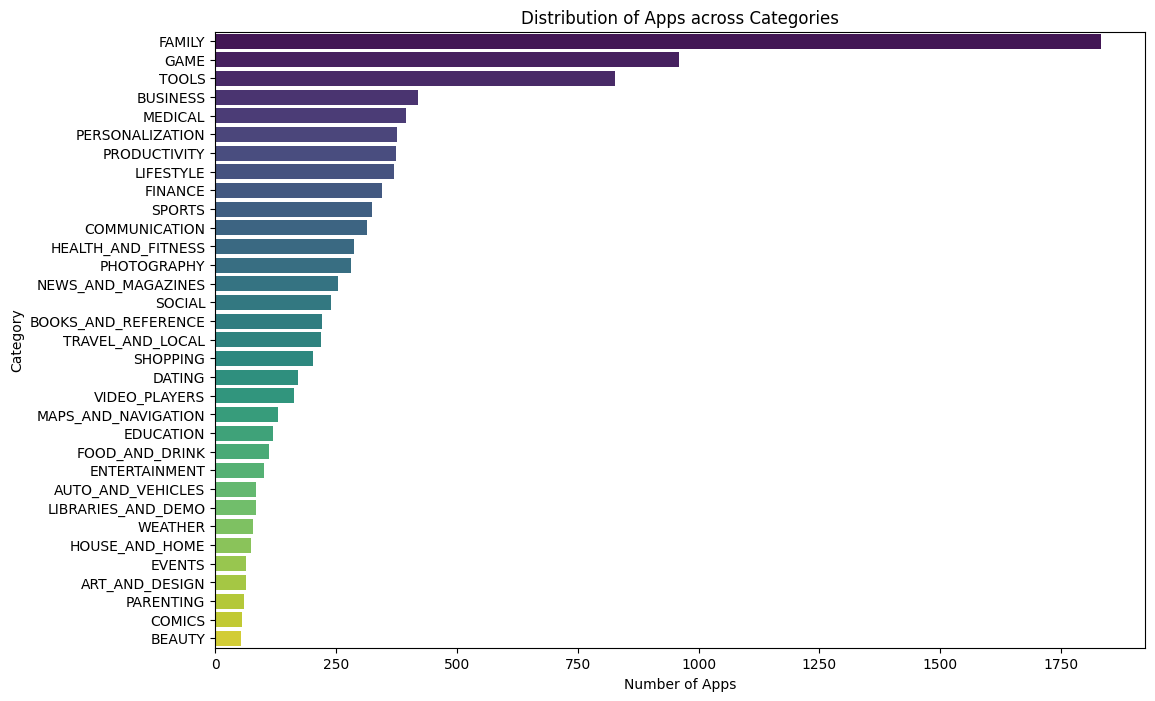

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(y=category_count.index, x=category_count.values, palette='viridis')
plt.title('Distribution of Apps across Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

Metrics Analysis

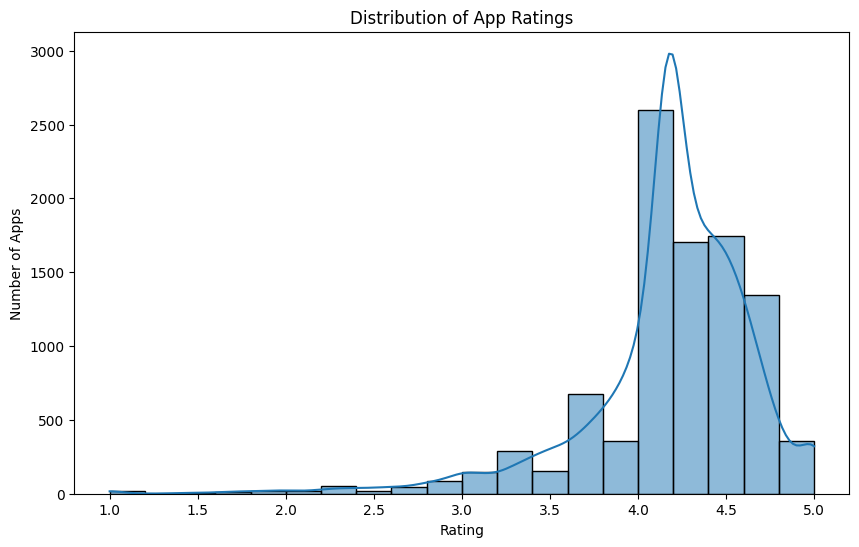

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(apps['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()

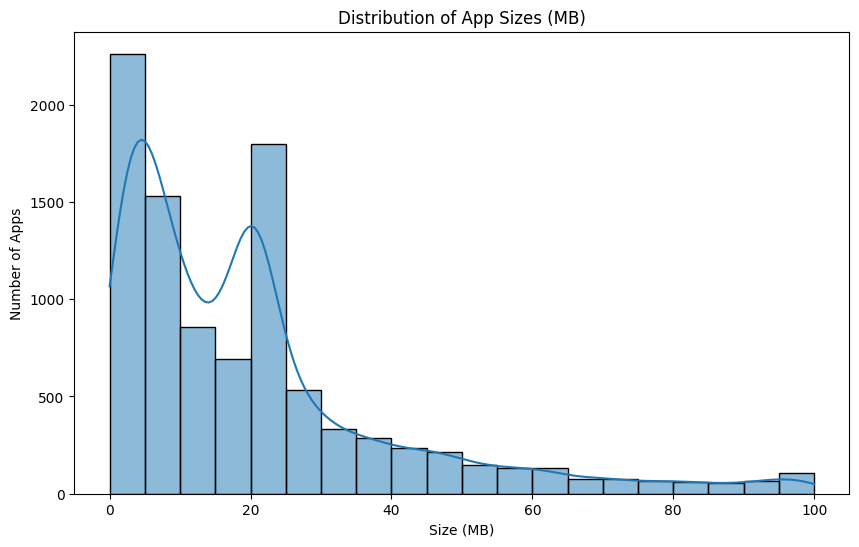

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(apps['Size'], bins=20, kde=True)
plt.title('Distribution of App Sizes (MB)')
plt.xlabel('Size (MB)')
plt.ylabel('Number of Apps')
plt.show()

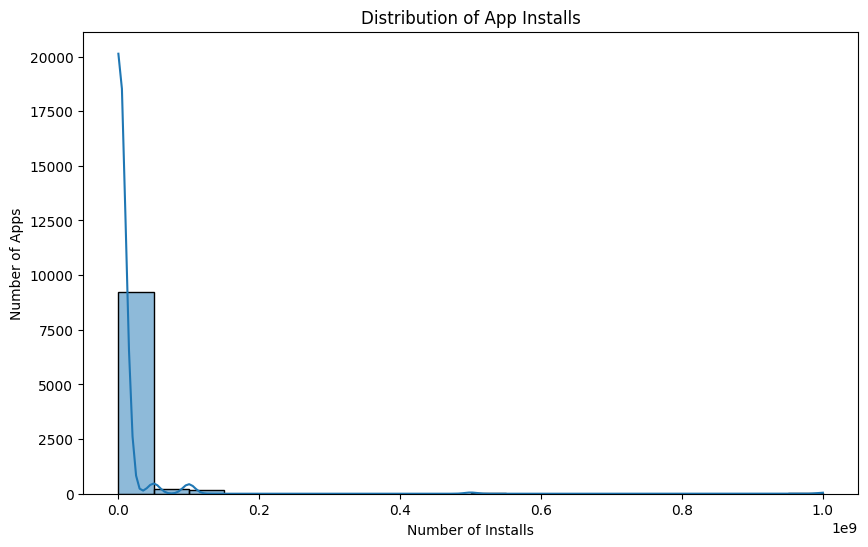

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(apps['Installs'], bins=20, kde=True)
plt.title('Distribution of App Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Number of Apps')
plt.show()

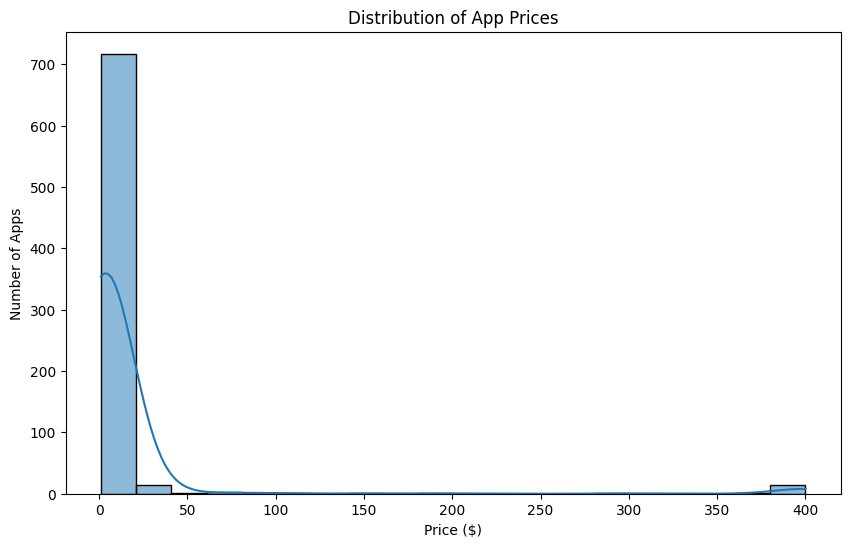

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(apps[apps['Price'] > 0]['Price'], bins=20, kde=True)
plt.title('Distribution of App Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Apps')
plt.show()

Sentiment Analysis

In [33]:
sentiment_count = user_reviews['Sentiment'].value_counts()

<ipython-input-34-6aa1ea6c8c36>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='viridis')


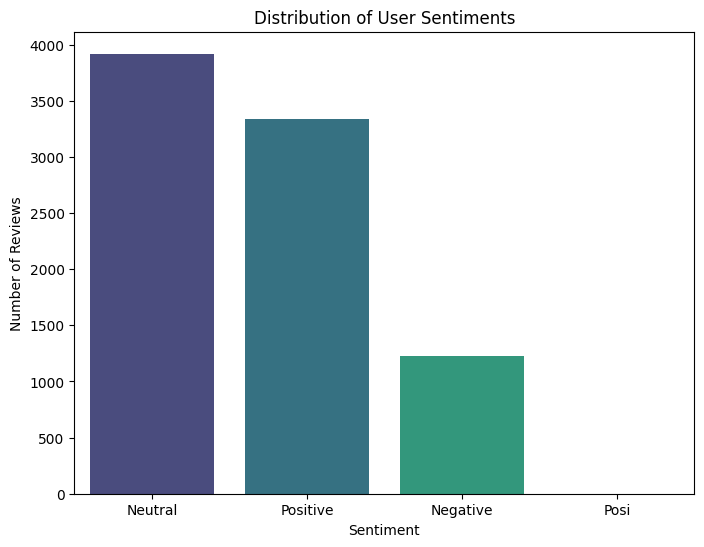

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='viridis')
plt.title('Distribution of User Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [35]:
fig = px.scatter(apps, x='Size', y='Rating', color='Category',
                 title='Ratings vs. Size of Apps',
                 labels={'Size': 'Size (MB)', 'Rating': 'Rating'},
                 hover_data=['App'])
fig.show()

In [36]:
fig = px.bar(category_count, x=category_count.index, y=category_count.values,
             title='App Installs by Category',
             labels={'index': 'Category', 'value': 'Number of Installs'})
fig.show()

Summary

The code analyzes Google Play Store data to uncover insights into the Android app market. It begins by loading and preparing the datasets, ensuring data accuracy through cleaning and type conversion. The analysis explores app distribution across categories with a bar plot and examines metrics such as ratings, size, installs, and pricing trends using histograms. Sentiment analysis is conducted through user reviews, visualized with bar plots and scatter plots to show relationships between app size and ratings. Interactive visualizations are created using Plotly, enhancing the presentation of findings. Overall, the code effectively meets the project requirements while employing data analytics and visualization techniques.